In [1]:
from visualize_gml_data import gml_dataset 
import utils
from generator import generate, generate_and_give_tau
import em_gml
import initialisation_methods as init
import networkx as nx

In [2]:
def add_labels_to_gml(gml_path):
    with open(gml_path, 'r') as file:
        lines = file.readlines()

    new_lines = []
    node_id = None
    for line in lines:
        stripped_line = line.strip()
        if stripped_line.startswith('id'):
            # Extract the id and remember it for when we might need to add a label
            node_id = stripped_line.split()[1]
        elif stripped_line.startswith('label'):
            # Reset the node_id since this node has a label
            node_id = None
        elif stripped_line == ']':
            # We're at the end of a node definition; check if we need to add a label
            if node_id is not None:
                # Insert a label line
                new_lines.append('    label "{}"\n'.format(node_id))
                node_id = None
        # Always append the current line
        new_lines.append(line)

    # Write the modified lines to a new GML file
    with open(gml_path, 'w') as file:
        file.writelines(new_lines)

# Replace 'your_file.gml' with the path to your GML file
add_labels_to_gml('data/power/power.gml')

# Use the modified function to read your GML file


In [3]:
adjnoun=gml_dataset('data/adjnoun/adjnoun.gml')

In [4]:
gml_dataset.print_general(adjnoun)

The graph has  112  nodes and  425  edges
The graph has  1  connected components.
The largest connected component in the graph has  112 nodes
The largest connected component in the graph has  425  edges
The minimum degree of a node is :  1
The maximum degree of a node is :  49
The mean degree of a node is :  7.589285714285714
The median degree of a node is :  6.0
The clustering coefficient of the graph G is :  0.15693497881746177


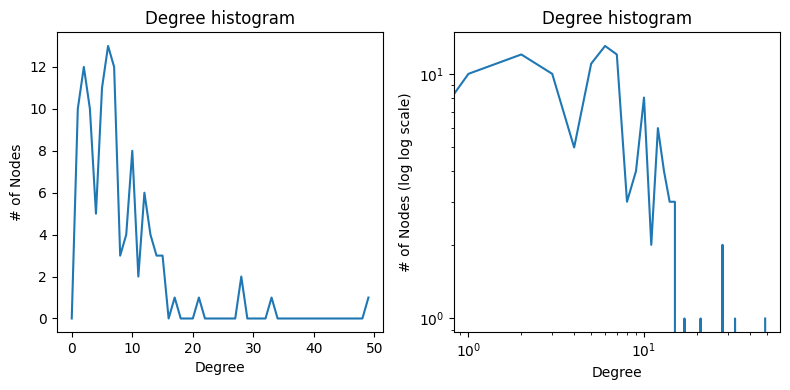

In [5]:
gml_dataset.plot_figure_graph(adjnoun)

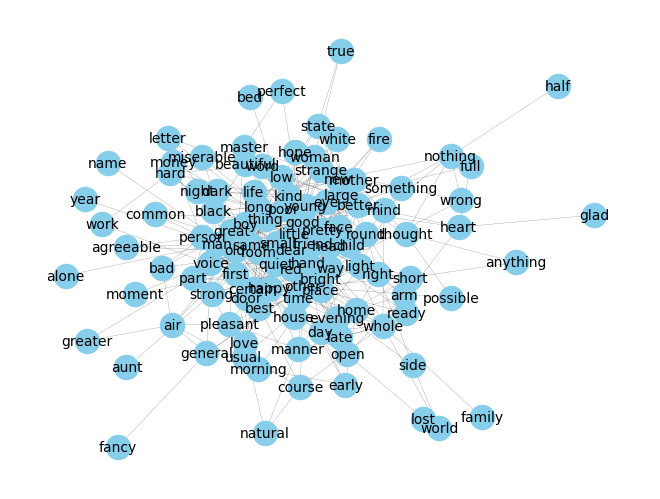

In [6]:
gml_dataset.show_graph(adjnoun)

In [7]:
model=em_gml.mixtureModel(adjnoun)

In [8]:
results=model.fit()

number of clusters 2


/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


number of clusters 3


/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


number of clusters 4


/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexandrefrancois/Documents/MVA/Probabilistic graphical models/Code projet/Mixture4graph/em_gml.py:141: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


number of clusters 5
number of clusters 6


/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


number of clusters 7


/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexandrefrancois/Documents/MVA/Probabilistic graphical models/Code projet/Mixture4graph/em_gml.py:141: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))
/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


number of clusters 8


/Users/alexandrefrancois/Documents/MVA/Probabilistic graphical models/Code projet/Mixture4graph/em_gml.py:141: RuntimeWarning: divide by zero encountered in log
  exp_term = np.where(exp_term == 0, 0, np.log(exp_term))


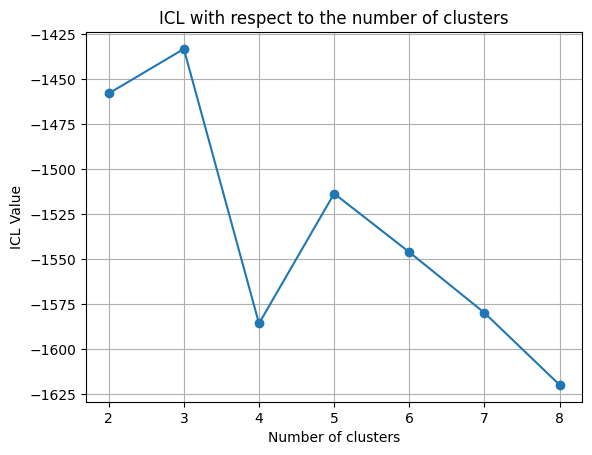

In [9]:
model.plot_icl()

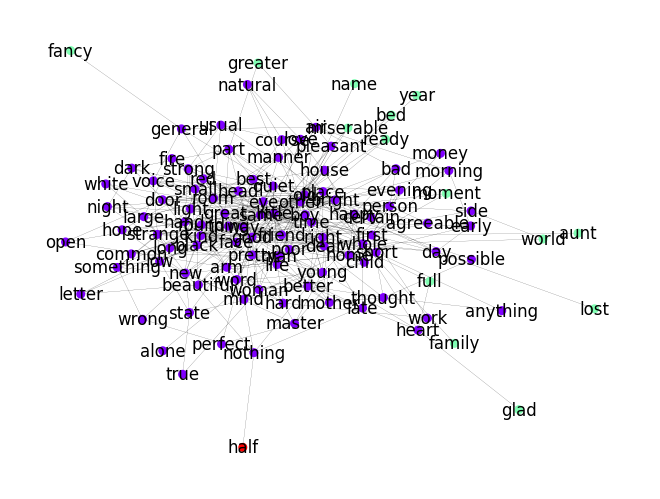

In [10]:
utils.show_graph_cluster_color(adjnoun.data, model.results[4]['tau'])


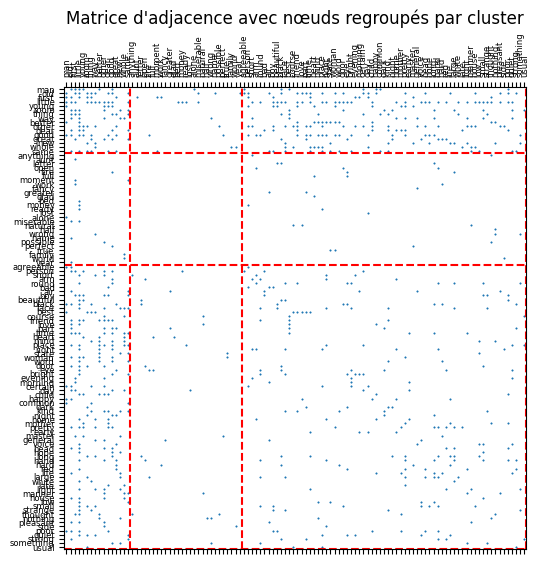

In [11]:
model.plot_adjency_matrix(5)

In [32]:
print(model.results[3]['pi'])

[[0.48719588 0.14384872 0.43139151]
 [0.14384872 0.0159042  0.03812958]
 [0.43139151 0.03812958 0.11016005]]


In [12]:
tau_modularity=init.modularity_clustering_optim(adjnoun.data,3)
tau_spectral=init.spectral_clustering(adjnoun.data,3)

/Users/alexandrefrancois/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


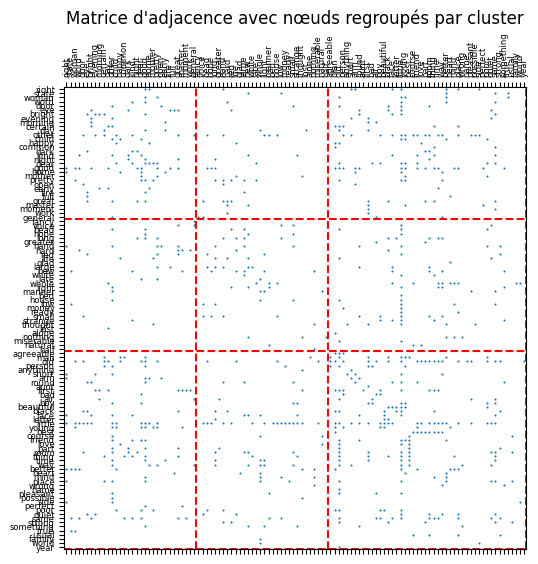

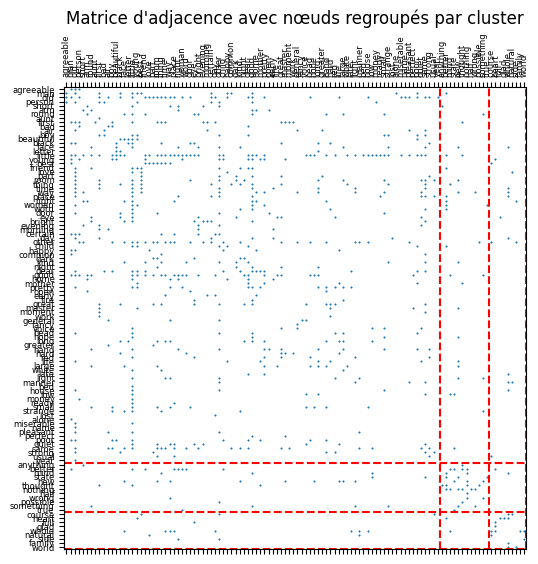

In [13]:
utils.plot_adjency_matrix(adjnoun.data, tau_modularity, 3)
utils.plot_adjency_matrix(adjnoun.data, tau_spectral, 3)

In [24]:
clusters=utils.get_clusters(adjnoun.data,model.results[3]['tau'] ,3)

In [25]:
print(clusters[0])
print(clusters[1])
print(clusters[2])



['old', 'little', 'other', 'good', 'same']
['agreeable', 'anything', 'arm', 'aunt', 'bad', 'beautiful', 'letter', 'course', 'love', 'heart', 'mind', 'state', 'evening', 'morning', 'happy', 'common', 'dark', 'night', 'mother', 'open', 'early', 'fire', 'full', 'master', 'moment', 'work', 'general', 'fancy', 'voice', 'hope', 'greater', 'hard', 'glad', 'white', 'late', 'manner', 'bed', 'house', 'low', 'money', 'ready', 'strange', 'lost', 'alone', 'nothing', 'miserable', 'natural', 'half', 'wrong', 'name', 'pleasant', 'possible', 'side', 'perfect', 'something', 'true', 'usual', 'family', 'world', 'year']
['man', 'person', 'short', 'round', 'first', 'air', 'boy', 'black', 'face', 'young', 'best', 'friend', 'part', 'room', 'thing', 'time', 'way', 'better', 'place', 'right', 'woman', 'word', 'door', 'eye', 'bright', 'certain', 'day', 'child', 'kind', 'dear', 'home', 'pretty', 'great', 'head', 'long', 'hand', 'red', 'life', 'large', 'new', 'whole', 'light', 'small', 'thought', 'poor', 'quiet', 